In [1]:
%matplotlib widget

In [2]:
from pathlib import Path

import numpy as np
import scipy as sp
import matplotlib.pylab as plt

In [3]:
x_hat_fname = '../tests/gold_prelim/x_20080201_20080214_4e-5_fess'

In [4]:
NRAD = 20
NTHETA = 30
NPHI = 60

RMIN = 1.5
RMAX = 3.5

In [5]:
rad_centers = np.linspace(RMIN + (RMAX-RMIN)/NRAD/2, RMAX - (RMAX-RMIN)/NRAD/2, NRAD)
lat_centers = np.linspace(-90 + 90/NTHETA, 90 - 90/NTHETA, NTHETA)
lon_centers = np.linspace(360/NPHI/2, 360 - 360/NPHI/2, NPHI)

In [6]:
rad_edges = np.linspace(RMIN, RMAX, NRAD+1)
lat_edges = np.linspace(-90, 90, NTHETA+1)
lon_edges = np.linspace(0, 360, NPHI+1)

In [7]:
rad_delta = (RMAX-RMIN)/NRAD
lat_delta = 180/NTHETA
lon_delta = 360/NPHI

In [8]:
x_hat = np.fromfile(x_hat_fname, dtype=np.float32)

In [9]:
x_hat = np.reshape(x_hat, (NRAD, NTHETA, NPHI), order='F')

## Fixed rad slice

In [10]:
extent_rad = [lon_edges[0], lon_edges[-1], lat_edges[0], lat_edges[-1]]

In [11]:
I = 2

In [12]:
lat_delta / lon_delta

1.0

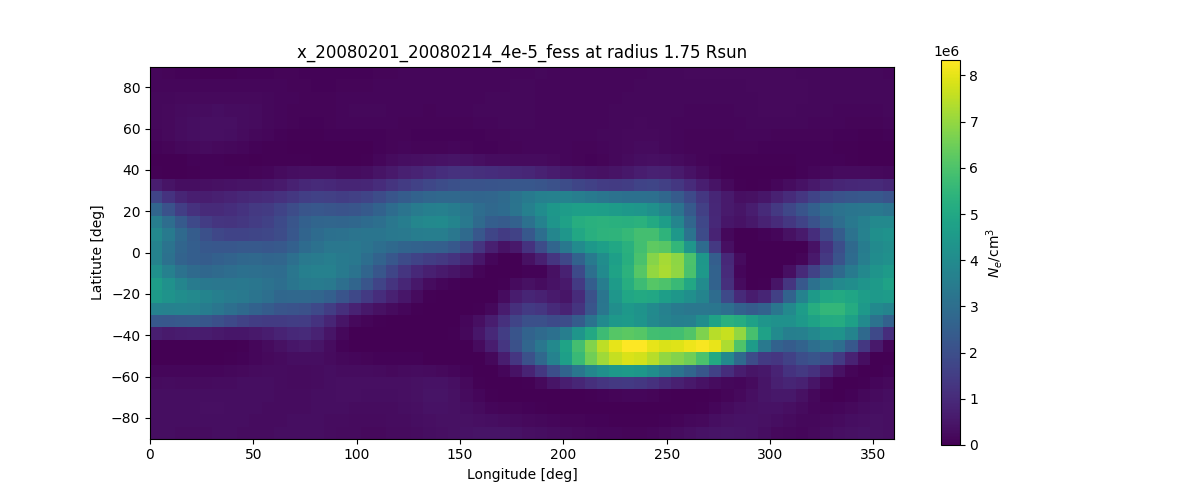

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
im = ax.imshow(x_hat[I, :, :], extent=extent_rad, origin='lower', aspect=lon_delta/lat_delta)
ax.set_xlabel('Longitude [deg]')
ax.set_ylabel('Latitute [deg]')
ax.set_title(f'{Path(x_hat_fname).name} at radius {rad_centers[I]:.2f} Rsun')
cb = fig.colorbar(im, ax=ax, label='$N_e / $cm$^3$');

##  Fixed lon slice

In [14]:
I = 0

In [15]:
extent_lon = [lat_edges[0], lat_edges[-1], rad_edges[0], rad_edges[-1]]

In [16]:
lat_delta / rad_delta

60.0

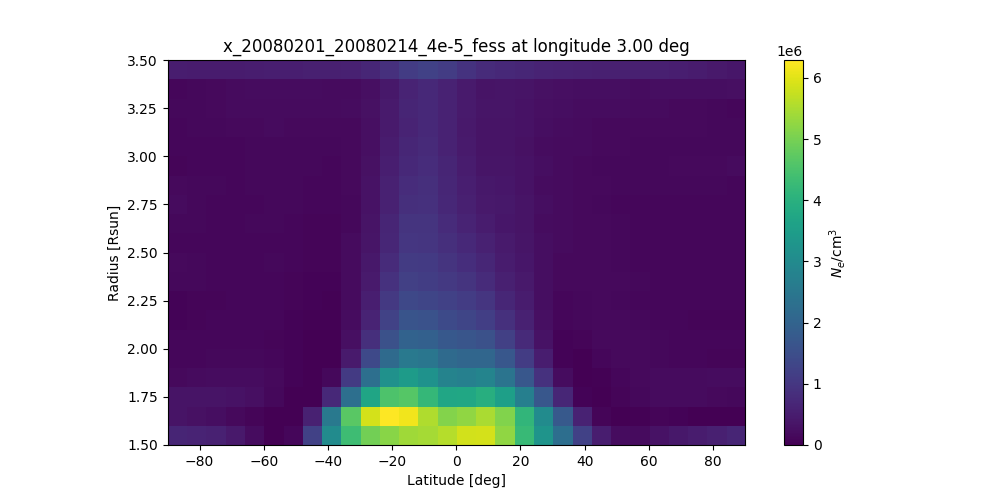

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(x_hat[:, :, I], extent=extent_lon, origin='lower', aspect=lat_delta/rad_delta)
ax.set_xlabel('Latitude [deg]')
ax.set_ylabel('Radius [Rsun]')
ax.set_title(f'{Path(x_hat_fname).name} at longitude {lon_centers[I]:.2f} deg')
cb = fig.colorbar(im, ax=ax, label='$N_e / $cm$^3$');

In [18]:
NX = 512
NY = 2*NX

X, Y = np.meshgrid(np.linspace(0, RMAX, NX), np.linspace(-RMAX, RMAX, NY), indexing='xy')
R = np.sqrt(X**2 + Y**2)
THETA = np.rad2deg(np.arctan2(Y, X))

In [19]:
lon_interp = sp.interpolate.RegularGridInterpolator((rad_centers, lat_centers), x_hat[:, :, I], 
                                                    method='nearest', 
                                                    bounds_error=False, 
                                                    fill_value=None)

In [20]:
J = (R < RMIN) | (R > RMAX)

In [21]:
Z = lon_interp((R.flat, THETA.flat)).reshape((NY, NX))
Z[J] = np.nan

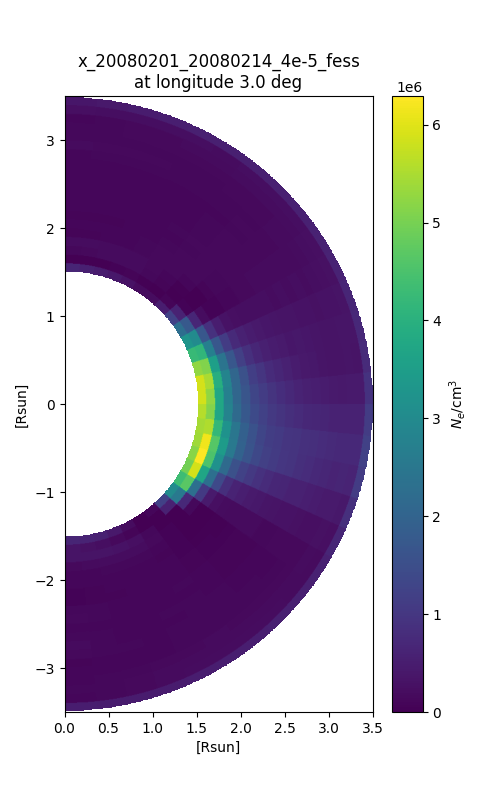

In [22]:
fig, ax = plt.subplots(figsize=(5, 8))
im = ax.imshow(Z, extent=(0, RMAX, -RMAX, RMAX), origin='lower')
ax.set_title(f'{Path(x_hat_fname).name}\nat longitude {lon_centers[I]} deg')
ax.set_xlabel('[Rsun]')
ax.set_ylabel('[Rsun]')
cb = fig.colorbar(im, ax=ax, label='$N_e / $cm$^3$');

## Fixed lat slice

In [23]:
I = NTHETA // 2

In [24]:
extent_lat = [lon_edges[0], lon_edges[-1], rad_edges[0], rad_edges[-1]]

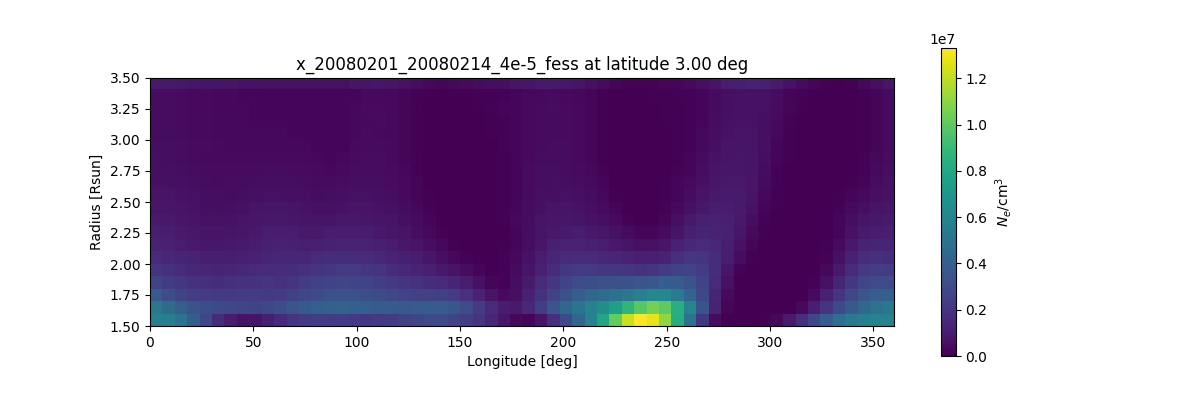

In [25]:
fig, ax = plt.subplots(figsize=(12, 4))
im = ax.imshow(x_hat[:, I, :], extent=extent_lat, origin='lower', aspect=lon_delta/rad_delta)
ax.set_xlabel('Longitude [deg]')
ax.set_ylabel('Radius [Rsun]')
ax.set_title(f'{Path(x_hat_fname).name} at latitude {lat_centers[I]:.2f} deg')
cb = fig.colorbar(im, ax=ax, label='$N_e / $cm$^3$');

In [26]:
NX = 512
NY = NX

X, Y = np.meshgrid(np.linspace(-RMAX, RMAX, NX), np.linspace(-RMAX, RMAX, NY), indexing='xy')
R = np.sqrt(X**2 + Y**2)
THETA = np.rad2deg(np.arctan2(Y, X))
J = THETA < 0
THETA[J] += 360

In [27]:
lat_interp = sp.interpolate.RegularGridInterpolator((rad_centers, lon_centers), x_hat[:, I, :], 
                                                    method='nearest', 
                                                    bounds_error=False, 
                                                    fill_value=None)

In [28]:
J = (R < RMIN) | (R > RMAX)

In [29]:
Z = lat_interp((R.flat, THETA.flat)).reshape((NY, NX))
Z[J] = np.nan

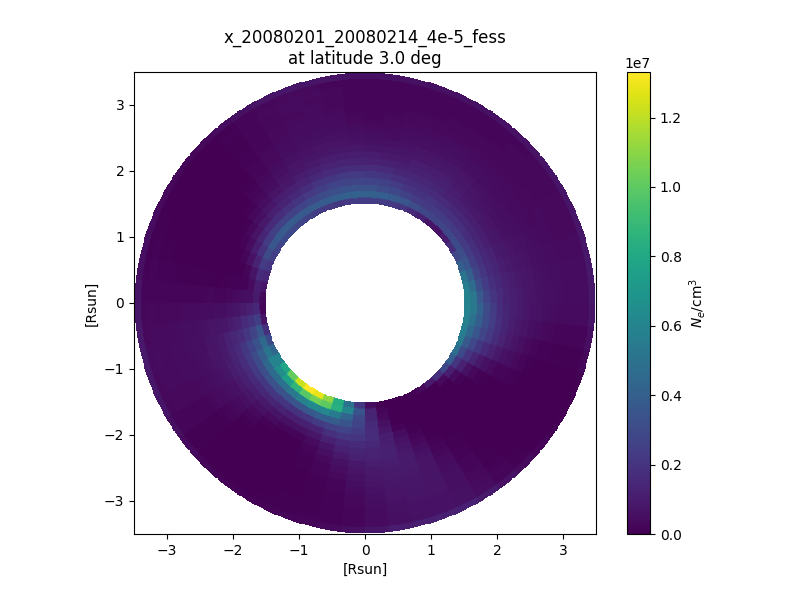

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(Z, extent=(-RMAX, RMAX, -RMAX, RMAX), origin='lower')
ax.set_title(f'{Path(x_hat_fname).name}\nat latitude {lat_centers[I]} deg')
ax.set_xlabel('[Rsun]')
ax.set_ylabel('[Rsun]')
cb = fig.colorbar(im, ax=ax, label='$N_e / $cm$^3$');